In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Member,Message
from agents import Group

 
[2024-12-09 15:08:53][INFO]: All agents are fully connected


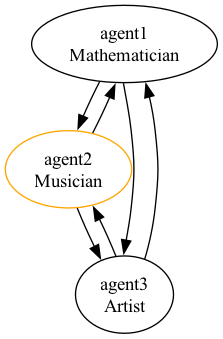

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Member(name="agent3", role="Artist", description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True) 

Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [4]:
g.group_messages.context

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [5]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
print('-'*50)
print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=2,send_to=g.current_agent))

 
[2024-12-09 15:08:58][INFO]: handoff from agent2 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "8466ad51-f8c7-4e18-a3ff-5d010e018867",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math.",
                "access_token": null
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music.",
                "access_token": null
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art.",
                "access_token": null


In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-09 15:09:16][INFO]: handoff from agent2 to agent2 by using auto2 mode


Message(sender='agent2', action='talk', result='If you\'re looking for music that pairs well with reading, there are several genres and styles that can enhance your experience without being too distracting. Here are some recommendations:\n\n1. **Classical Music**: Composers like Johann Sebastian Bach, Claude Debussy, and Erik Satie create soothing soundscapes that can help maintain focus. Works such as Bach\'s "Goldberg Variations" or Debussy\'s "Clair de Lune" are particularly calming.\n\n2. **Ambient Music**: Artists like Brian Eno specialize in ambient music, which is designed to be atmospheric and non-intrusive. Albums like "Music for Airports" can create a serene backdrop for reading.\n\n3. **Instrumental Jazz**: Soft jazz, especially piano or guitar-focused pieces, can provide a warm, inviting atmosphere. Artists like Bill Evans or the smooth sounds of Stan Getz can complement your reading sessions nicely.\n\n4. **Nature Sounds**: If you prefer something even less melodic, consid

In [7]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 15:09:22][INFO]: handoff from agent2 to agent3 by using auto2 mode


Message(sender='agent3', action='talk', result="Beauty is a complex and multifaceted concept that has been explored by philosophers, artists, and thinkers throughout history. It often encompasses aesthetic pleasure, emotional resonance, and the profound impact that art and nature can have on individuals.\n\nIn the realm of art, beauty can be seen in the harmony of colors, the balance of composition, and the skill with which an artist conveys emotion. The subjective nature of beauty means that what one person finds beautiful might not resonate with another, highlighting the importance of personal experience and context. \n\nPhilosophically, beauty has been defined in various ways, from Plato's idea of beauty as an ideal form to Kant’s emphasis on the experience of beauty as a subjective feeling. In contemporary discussions, beauty often intersects with concepts of culture, identity, and social norms, challenging traditional standards and inviting a broader understanding of what it means

In [8]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 15:09:27][INFO]: handoff from agent3 to agent1 by using auto2 mode


Message(sender='agent1', action='talk', result='Beauty is indeed a fascinating topic that intertwines with mathematics in intriguing ways. For example, the concept of symmetry, which is often associated with beauty, can be explored through geometric principles. The Fibonacci sequence and the golden ratio are mathematical concepts that appear in nature and art, often leading to compositions that are perceived as beautiful.\n\nIn architecture, proportions and symmetry play a crucial role in creating structures that are visually pleasing. The use of fractals in nature, like the branching of trees or the patterns of leaves, also highlights the intersection of mathematical patterns and aesthetic appreciation.\n\nMoreover, the study of patterns and structures in mathematics can evoke feelings of beauty through the elegance of proofs and the simplicity of equations. This analytical perspective allows us to appreciate beauty in a different light, seeing it not just as a subjective experience b

In [9]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 15:09:33][INFO]: handoff from agent1 to agent2 by using auto2 mode


Message(sender='agent2', action='talk', result="Beauty, as we've seen in the discussions, is a multifaceted concept that transcends disciplines, weaving through art, philosophy, and even mathematics. Each perspective adds depth to our understanding of what beauty means and how it is perceived.\n\nFrom an artistic standpoint, beauty is often tied to emotional experiences and the harmony of elements within a work. Artists have long grappled with the challenge of capturing beauty, whether through the delicate brushstrokes of a painting or the intricate melodies of a musical composition. The subjective nature of beauty means that each individual's experiences shape their perception, allowing for a rich tapestry of interpretations.\n\nPhilosophically, beauty has been a topic of debate for centuries. Thinkers like Plato posited that beauty exists as an ideal form, while Kant emphasized the personal experience of beauty, suggesting that our appreciation is rooted in subjective feelings rather

In [10]:
print('-'*50)
print(g.current_agent)
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

--------------------------------------------------
agent2
--------------------------------------------------
### Background Information

This is a test environment

### Members

- agent1 (Mathematician)
- agent2 (Musician)
- agent3 (Artist)

### Your Previous Message

```agent2:talk
Beauty, as we've seen in the discussions, is a multifaceted concept that transcends disciplines, weaving through art, philosophy, and even mathematics. Each perspective adds depth to our understanding of what beauty means and how it is perceived.

From an artistic standpoint, beauty is often tied to emotional experiences and the harmony of elements within a work. Artists have long grappled with the challenge of capturing beauty, whether through the delicate brushstrokes of a painting or the intricate melodies of a musical composition. The subjective nature of beauty means that each individual's experiences shape their perception, allowing for a rich tapestry of interpretations.

Philosophically, beauty has 

In [11]:
g.call_agent(agent="agent1",model="gpt-4o-mini")

Message(sender='agent1', action='talk', result='Beauty is a concept that resonates across various fields, from mathematics to art, philosophy, and music. Each discipline contributes unique insights into our understanding of beauty and how it is perceived.\n\nIn mathematics, beauty often emerges through patterns, symmetry, and elegance. The Fibonacci sequence and the golden ratio are prime examples of mathematical concepts that are frequently associated with beauty in nature and art. These principles create harmony in design, whether in architecture, visual arts, or even musical compositions. The aesthetic appeal of mathematical structures can evoke feelings of wonder and appreciation, illustrating the deep connection between mathematics and beauty.\n\nFrom an artistic viewpoint, beauty is closely linked to emotional expression and the sensory experience of art. Artists strive to capture beauty through various mediums, whether it be through color, form, or sound. The subjective nature o

## Add and Delete Member

 
[2024-12-09 15:09:51][INFO]: Self-defined relationships


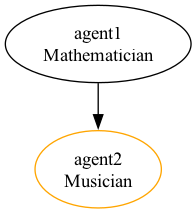

In [16]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-09 15:09:51][INFO]: Self-defined relationships
 
[2024-12-09 15:09:51][INFO]: Succesfully add member agent3


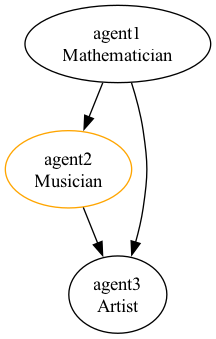

In [17]:
g.add_member(
        Member(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),[("agent1","agent3"),("agent2","agent3")]
    )

Image(g.draw_relations())

 
[2024-12-09 15:09:51][INFO]: Self-defined relationships
 
[2024-12-09 15:09:51][INFO]: current agent agent2 is deleted, randomly select agent3 as the new current agent
 
[2024-12-09 15:09:51][INFO]: Successfully delete member agent2


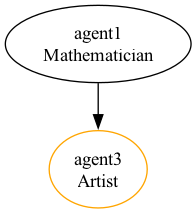

In [18]:
g.delete_member("agent2")
Image(g.draw_relations())

In [19]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")
print("Selected Agent: ",next_agent)

 
[2024-12-09 15:09:51][INFO]: handoff from agent3 to agent3 by using auto2 mode
Selected Agent:  agent3
